# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

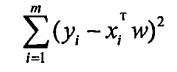

对W求导，当导数为零时，平方误差最小，此时W等于：

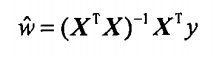

例如有下面一张图片：

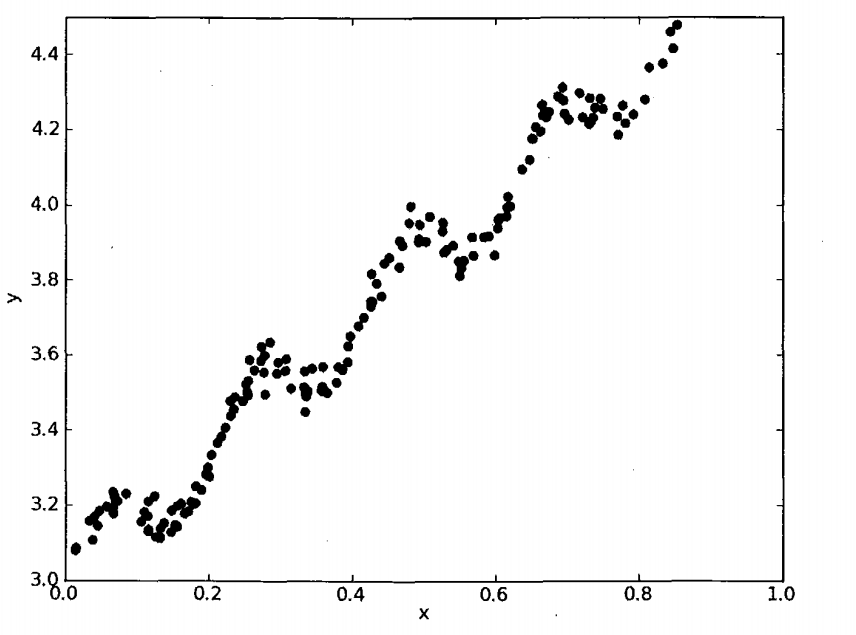

求回归曲线，得到：

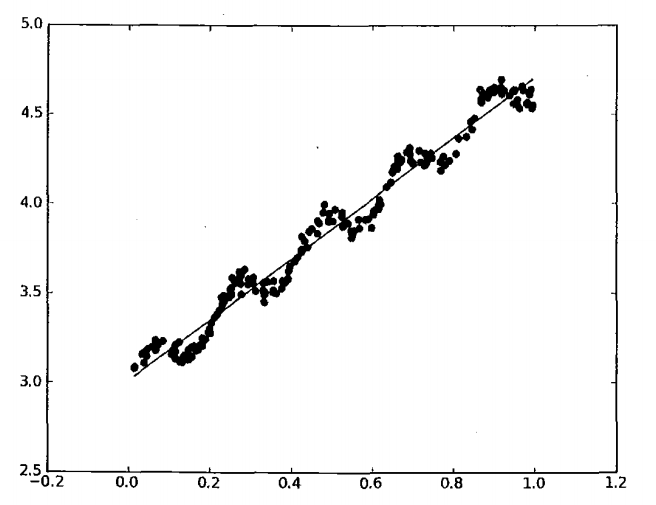

### 2、实例

导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 获取糖尿病信息
from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
%matplotlib inline

获取糖尿病数据

In [2]:
diabete = load_diabetes()

In [4]:
data = diabete.data
target = diabete.target
feature_names = diabete.feature_names

In [5]:
train = DataFrame(data=data,columns=feature_names)

抽取训练数据和预测数据

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

创建数学模型

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear = LinearRegression()

第一步：训练

In [13]:
linear.fit(X_train,y_train)
linear.score(X_test,y_test)

0.43843604017332705

第二步：预测

第三步：绘制图形

In [15]:
y_ = linear.predict(X_test)

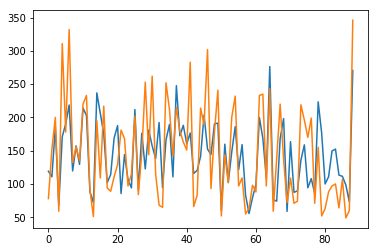

In [18]:
plt.plot(y_,label='Preidict')
plt.plot(y_test,label='True')

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_)

0.43843604017332705

In [39]:
np.abs(y_test-y2_).mean()

45.16404494382022

In [40]:
np.abs(y_test - y_).mean()

41.97487568546232

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knnrgr = KNeighborsRegressor()

In [25]:
knnrgr.fit(X_train,y_train)
y2_ = knnrgr.predict(X_test)

In [26]:
(y_test - y2_).mean()

10.21123595505618

In [31]:
y_test

array([ 78., 152., 200.,  59., 311., 178., 332., 132., 156., 135., 220.,
       233.,  91.,  51., 195., 109., 217.,  94.,  89., 111., 129., 181.,
       168.,  97., 115., 202.,  84., 147., 253., 144., 262., 115.,  68.,
        65., 252., 212., 142., 215., 180., 163., 151., 283.,  66.,  83.,
       214., 189., 302.,  93., 178., 241.,  52., 144., 102., 200., 232.,
        97., 109.,  55.,  63.,  98.,  88., 233., 235.,  97., 243.,  59.,
       138., 220., 137.,  72., 109.,  71.,  74., 219., 196., 170., 199.,
        71., 155.,  52.,  63.,  88.,  97., 100.,  64., 107.,  49.,  60.,
       346.])

In [32]:
y_

array([119.13799987, 110.77391294, 185.03753525,  68.01004306,
       171.05567482, 190.41947176, 218.59025339, 119.63203852,
       157.27055681, 129.49872542, 214.15084822, 202.92431405,
        88.4181873 ,  71.96126603, 236.88942627, 206.09343437,
       175.60327536, 101.96534184, 114.11351232, 169.04365354,
       187.71441733,  85.64602789, 144.13474562, 107.06624664,
        94.04637611, 211.79767975,  90.73461365, 176.22790243,
       122.6261966 , 180.92749416, 157.11699049, 138.04487003,
       192.36254696,  94.45416136, 166.30827404, 189.43543051,
       110.67405987, 247.68070805, 172.47439934, 188.09285247,
       160.08467765, 176.65356546, 115.81421227, 120.23211066,
       141.53507307, 203.40938551, 152.4289922 , 144.0956641 ,
       190.19046181, 191.49811884,  59.80970305, 159.75512015,
       102.14584494, 147.89327376, 186.10225504, 121.4055051 ,
       159.12490592,  83.44071751,  55.57595531,  79.08566367,
        99.45849105, 199.89400313, 168.54820049, 109.16

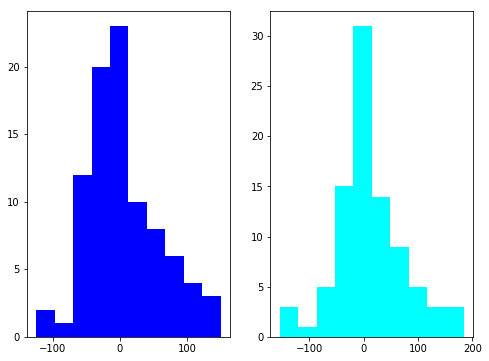

In [35]:
# 残差直方图 观察线性回归模型的好坏
# x轴表示真实值和预测值之间的差
# y轴表示落在某个差区间的数据的数量
# 一般符合正态分布，图越瘦高就越好，越扁平就越不好
plt.figure(figsize=(8,6))
ax1 = plt.subplot(121)
h1 = ax1.hist(y_test-y_,bins=10,color='blue')

ax2 = plt.subplot(122)
h2 = ax2.hist(y_test-y2_,bins=10,color='cyan')

In [41]:
train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [42]:
# 研究一个特征对结果的影响
train1 = train['bmi']

In [62]:
train1 = train1.values.reshape(-1,1)

In [43]:
linear1 = LinearRegression()

In [63]:
X_train,X_test,y_train,y_test = train_test_split(train1,target,test_size=0.2,random_state=1)

In [64]:
linear1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
y_ = linear1.predict(X_test)

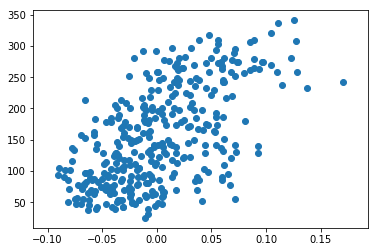

In [68]:
plt.scatter(X_train,y_train)

In [69]:
test = np.linspace(X_train.min(),X_train.max(),100).reshape(-1,1)
y_ = linear1.predict(test)

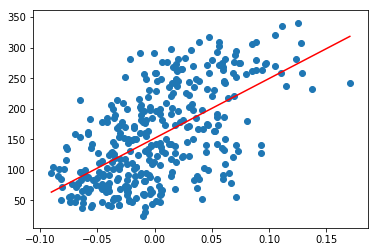

In [73]:
plt.plot(test,y_,color='red')
plt.scatter(X_train,y_train)

## 二、岭回归

### 1、原理

缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

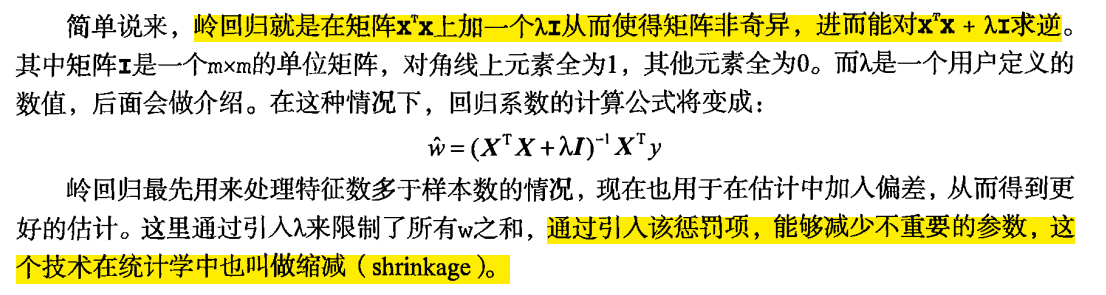

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用在样本值不够的时候

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
x = np.array([[1,1,1],[2,2,2]])
y = np.array([3,1])

使用普通线性回归

In [4]:
from sklearn.linear_model import LinearRegression,Ridge

In [5]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# 获取机器学习模型的系数
linear.coef_

array([-0.66666667, -0.66666667, -0.66666667])

使用岭回归

In [10]:
# alpha 就是岭回归中的λ
ridge = Ridge(alpha=5)
ridge.fit(x,y)
ridge.coef_

array([-0.15384615, -0.15384615, -0.15384615])

In [ ]:
# 构建模型
# 训练fit()
# 预测predict()

In [11]:
# 使用岭回归处理波士顿房价信息
from sklearn.datasets import load_boston

In [13]:
boston = load_boston()

In [16]:
data = boston.data
target = boston.target

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
# 发现归一化数据仍然不在一个量级，所以可以使用区归一化
data = data/data.sum()

In [21]:
data

array([[1.37112145e-08, 3.90509275e-05, 5.01153570e-06, ...,
        3.31932884e-05, 8.61072951e-04, 1.08040899e-05],
       [5.92489350e-08, 0.00000000e+00, 1.53383365e-05, ...,
        3.86170283e-05, 8.61072951e-04, 1.98291932e-05],
       [5.92055451e-08, 0.00000000e+00, 1.53383365e-05, ...,
        3.86170283e-05, 8.52243103e-04, 8.74306877e-06],
       ...,
       [1.31818575e-07, 0.00000000e+00, 2.58820869e-05, ...,
        4.55594154e-05, 8.61072951e-04, 1.22359573e-05],
       [2.37755064e-07, 0.00000000e+00, 2.58820869e-05, ...,
        4.55594154e-05, 8.53588190e-04, 1.40583339e-05],
       [1.02855804e-07, 0.00000000e+00, 2.58820869e-05, ...,
        4.55594154e-05, 8.61072951e-04, 1.70956283e-05]])

In [32]:
data/(data.max(axis=0) - data.min(axis=0))

array([[7.10352762e-05, 1.80000000e-01, 8.46774194e-02, ...,
        1.62765957e+00, 1.00080690e+00, 1.37417219e-01],
       [3.06957815e-04, 0.00000000e+00, 2.59164223e-01, ...,
        1.89361702e+00, 1.00080690e+00, 2.52207506e-01],
       [3.06733020e-04, 0.00000000e+00, 2.59164223e-01, ...,
        1.89361702e+00, 9.90544153e-01, 1.11203091e-01],
       ...,
       [6.82927750e-04, 0.00000000e+00, 4.37316716e-01, ...,
        2.23404255e+00, 1.00080690e+00, 1.55629139e-01],
       [1.23176518e-03, 0.00000000e+00, 4.37316716e-01, ...,
        2.23404255e+00, 9.92107519e-01, 1.78807947e-01],
       [5.32876969e-04, 0.00000000e+00, 4.37316716e-01, ...,
        2.23404255e+00, 1.00080690e+00, 2.17439294e-01]])

In [33]:
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler

In [34]:
Normalizer().fit_transform(data)

array([[1.26388341e-05, 3.59966795e-02, 4.61957387e-03, ...,
        3.05971776e-02, 7.93726783e-01, 9.95908132e-03],
       [5.78529889e-05, 0.00000000e+00, 1.49769546e-02, ...,
        3.77071843e-02, 8.40785474e-01, 1.93620036e-02],
       [5.85729947e-05, 0.00000000e+00, 1.51744622e-02, ...,
        3.82044450e-02, 8.43137761e-01, 8.64965806e-03],
       ...,
       [1.23765824e-04, 0.00000000e+00, 2.43009593e-02, ...,
        4.27762066e-02, 8.08470305e-01, 1.14884669e-02],
       [2.24644719e-04, 0.00000000e+00, 2.44548909e-02, ...,
        4.30471676e-02, 8.06519433e-01, 1.32831260e-02],
       [9.69214289e-05, 0.00000000e+00, 2.43887924e-02, ...,
        4.29308164e-02, 8.11392431e-01, 1.61092778e-02]])

In [36]:
MinMaxScaler().fit_transform(data)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [37]:
StandardScaler().fit_transform(data)

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
# 总结：数据归一化可以多种选择，最后选取最好的一种

In [38]:
train = StandardScaler().fit_transform(data)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [42]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
from sklearn.metrics import r2_score

In [44]:
y_ = linear.predict(X_test)
r2_score(y_test,y_)

0.7634809220792301

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

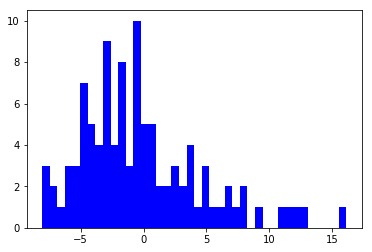

In [47]:
# 绘制残差直方图
ax = plt.subplot(111)
h = ax.hist(y_test-y_,bins=40,color='blue')

In [54]:
ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
y2_ = ridge.predict(X_test)

In [56]:
r2_score(y_test,y2_)

0.7616103859628631

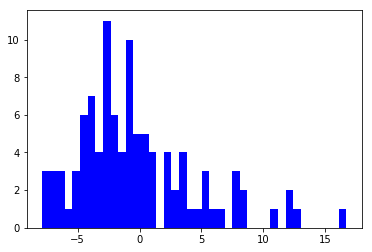

In [61]:
ax = plt.subplot(111)
h=ax.hist(y_test-y2_,bins=40,color='blue')

深入研究岭回归

- 理解岭回归缩减系数）

【备注】coef_函数可以获取机器学习模型中各个特征值的系数

拓展：岭回归

创建一个假象数据样本集

In [79]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10).reshape(-1,1))
y = np.array([1,2,3,4,5,6,7,8,9,0])

In [80]:
X.shape

(10, 10)

In [81]:
y

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

创建一个alpha集合，用以验证种不同alpha值对预测系数的结果的影响

In [82]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

In [86]:
ridge = Ridge()

coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

In [87]:
coefs

[array([  1819.53412019, -27063.46272544,  65274.47945518,  10250.91628795,
        -40890.66165915, -54611.04154283, -38339.06628244,  -5216.5915933 ,
         34680.65188921,  75108.97715174]),
 array([  1798.46260323, -26845.09204903,  65212.38250275,   9149.17191516,
        -40900.62270928, -53574.35637664, -37091.72183343,  -4552.86433476,
         34236.43739542,  73292.53839228]),
 array([  1774.64505633, -26581.00572966,  64998.37947566,   8142.42779738,
        -40817.39585111, -52528.54406027, -35894.77668113,  -3948.57685217,
         33767.12714355,  71513.80931432]),
 array([  1748.08450613, -26271.84631634,  64637.57487465,   7222.38619348,
        -40644.32935098, -51469.28939491, -34740.85294194,  -3398.64646968,
         33271.61512093,  69763.31769369]),
 array([  1718.78902206, -25918.27641617,  64134.82044956,   6381.45455153,
        -40384.58967197, -50392.75513378, -33623.27448955,  -2898.4261769 ,
         32748.97184872,  68032.53380041]),
 array([  1686.77424

创建岭回归机器学习算法对象

使用不同的alpha进行数据训练，保存所有训练结果的coef_

绘图查看alpha参数和coefs的关系

(0.025118864315095822, 3.9810717055349695e-11)

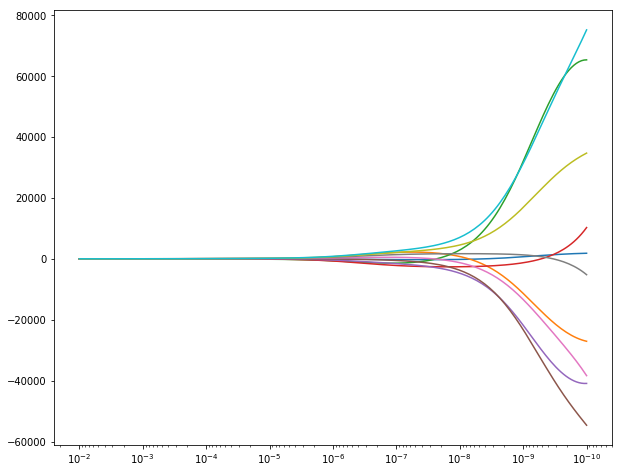

In [90]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
plt.xscale('log')
plt.plot(alphas,coefs)
ax.set_xlim(ax.get_xlim()[::-1])

## 三、lasso回归

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

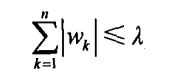

在lambda足够小的时候，一些系数会因此被迫缩减到0

In [94]:
boston = load_boston()

In [92]:
from sklearn.linear_model import Lasso

In [93]:
# alpha就是压缩系数的阀值
lasso = Lasso(alpha=1)

In [95]:
lasso.fit(boston.data,boston.target)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
# 观察发现，lasso把三个系数压缩为0
lasso.coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

In [103]:
ridge = Ridge(alpha=30)
ridge.fit(boston.data,boston.target)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
# 岭回归也可以缩减系数，但是没有lasso缩减的强烈
ridge.coef_

array([-0.10093177,  0.05149371, -0.04876595,  1.3223539 , -0.867158  ,
        3.27381009, -0.00781674, -1.21884268,  0.29067149, -0.0147587 ,
       -0.80505059,  0.00999335, -0.59381242])

### 2、实例

## 四、普通线性回归、岭回归与lasso回归比较

导包，导入sklearn.metrics.r2_score用于给模型打分

In [105]:
n_features = 200
n_samples = 50

In [107]:
X = np.random.randn(n_samples,n_features)

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

In [134]:
# 创建200个系数
coefs = np.random.random(size=200)

In [135]:
# 把后190个系数都设置为0,只保留10个有效数字，作为有效系数
coefs[10:] = 0

In [136]:
# 把真实的系数打乱
np.random.shuffle(coefs)

In [142]:
# 使用真实的系数跟样本集相乘，得到每一个样本的样本标签
y = np.dot(X,coefs)

In [146]:
noise = np.random.random(50) - 0.5

In [147]:
y += noise

In [148]:
X,y

(array([[-0.17355423,  1.71453482, -0.4085299 , ...,  0.07885749,
          0.36674359, -0.37187802],
        [-0.68975849, -0.42783648, -0.12691519, ..., -0.10096916,
          0.7034245 ,  0.28903756],
        [ 0.55392514,  0.80018271,  0.42057258, ..., -2.68274439,
          0.25379594,  1.30090035],
        ...,
        [-1.52042987,  0.90136001, -1.63386403, ...,  0.37204145,
          0.62919213, -0.12092249],
        [-0.46644299, -0.70478856,  0.81603784, ..., -0.20642682,
         -0.34500914,  0.82296207],
        [ 0.67254245,  0.1140901 , -1.58863832, ..., -1.89180413,
         -0.63035434, -0.81733692]]),
 array([-0.10732733,  1.20475672,  3.96936729, -1.28771793, -0.45676653,
         1.02409515,  2.48705346,  1.21251091, -2.20074936, -0.39934764,
         1.50327828,  1.84590453, -0.70300109,  1.33637214, -1.08553452,
         3.2536202 ,  1.87431468,  2.47534196, -1.33751188, -2.48983888,
         1.34954233, -0.60812342,  1.29653332,  0.17749491,  1.04639469,
        

训练数据和测试数据

In [149]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

Text(0.5,1,'Lasso')

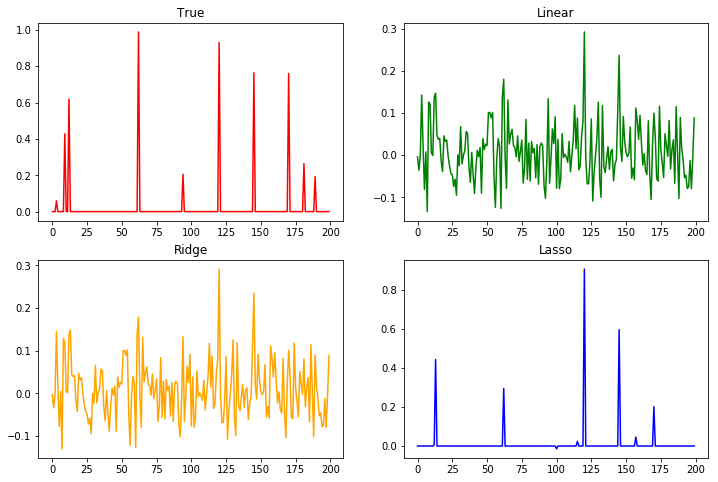

In [172]:
linear = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.3)

linear.fit(X,y)
ridge.fit(X,y)
lasso.fit(X,y)

plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,2,1)
ax1.plot(coefs,color='red')
ax1.set_title('True')

ax2 = plt.subplot(2,2,2)
ax2.plot(linear.coef_,color='green')
ax2.set_title('Linear')

ax3 = plt.subplot(2,2,3)
ax3.plot(ridge.coef_,color='orange')
ax3.set_title('Ridge')

ax4 = plt.subplot(2,2,4)
ax4.plot(lasso.coef_,color='blue')
ax4.set_title('Lasso')

分别使用线性回归，岭回归，Lasso回归进行数据预测

数据视图，此处获取各个算法的训练数据的coef_:系数

In [182]:
r2_score(y,linear.predict(X))

1.0

In [183]:
r2_score(y,ridge.predict(X))

0.9999934476910852

In [184]:
r2_score(y,lasso.predict(X))

0.8145964788173486

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

### 2、预测鲍鱼的年龄

abalone.txt